In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd

# Load the dataset, skipping the first row to correctly use the second row as the header
df = pd.read_csv('adult.data', header=None)

# Assign the correct column names (from the dataset documentation or other source)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
              'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
              'hours-per-week', 'native-country', 'income']

# Strip any leading or trailing spaces in the column names
df.columns = df.columns.str.strip()

# Now, print the first few rows of the dataset to verify the cleaning
print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [6]:
# Step 2: Preprocess the data
# Separate features (X) and target (y)
X = df.drop(columns='income')
y = df['income']

# Encode categorical variables using one-hot encoding
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'native-country']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)




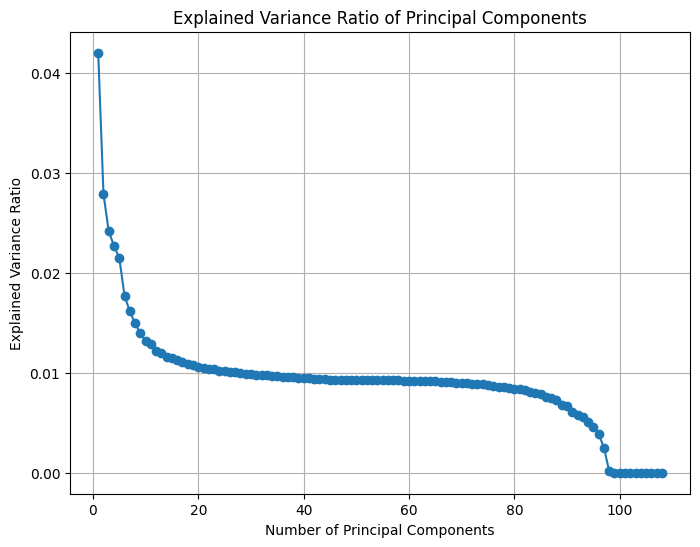

In [7]:
# Step 4: Perform Principal Component Analysis (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

# Step 6: Select a number of principal components to retain
num_components = 5
X_reduced = X_pca[:, :num_components]

# Step 7: Visualize the reduced data in a 2